<img src="image_fb.png" width="500">

# Take-Home Assignment: Fitbod 
   - by Apichart Hortiangtham

1. [Problem](#sec_prob)
2. [Import and Clean Data](#sec_import)    
3. [Exploratory Data Analysis (EDA)](#sec_eda)  
    - (3.1) [General EDA](#sec_eda_gen)
    - (3.2) [EDA: Focus on target variable](#sec_eda_target)
4. [Building a model](#sec_model)
5. [Conclusion](#sec_conc)

<a id='sec_prob'></a>
## (1) Problem
1.1 Your task is to prepare an EDA using jupyter notebook and python 3. This is deliberately left open ended, so as to best mirror a situation you may encounter at Fitbod.
- ***Understanding the summary statistics of datasets can give us insights into model selection, feature importance and so forth.***
   
1.2 Build a ML model of your choosing to predict something about the data. Given the size of the data set, we don't expect it to be a very good model, just functional. Show how it preformed, and how you would go about building this model if you received a larger dataset.

#### Deliverable: 
- A jupyter notebook with your results (please include plots inline, short written summaries using Mark Down cells, and code in the notebook). Please commit this to your personal git repo, instead of emailing back, if at all possible. 

#### Presentation: 
- Be prepared to present this to the data team in a brief 10 - 15 min presentation after submission.


<a id='sec_import'></a>
## (2) Import, Examine, and Clean Data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime

import matplotlib._color_data as mcd

In [2]:
# Set default Seaborn style
sns.set()

### Load the data

In [3]:
df = pd.read_csv('fitbod_AHORTIANGTHAM_20191031-184801.csv') 

### Examine the data

In [4]:
df.head()

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id
0,SE8Lsk6uWT,185.0,8.0,NaN,NaN,NaN,3,2wocVeN9l5,Barbell Decline Bench Press,zpnpjFUkCe,2017-01-18,fake_id_394
1,1Nr9Y3LecL,0.0,17.0,NaN,NaN,NaN,2,LWjfazmoHo,Bosu Ball Crunch,k4odY2oKQ9,2017-05-07,fake_id_394
2,dIYKlh5A1Z,20.0,5.0,NaN,NaN,NaN,2,OuNUIOuoon,Dumbbell Squat,5nhjXvSNMl,2017-07-06,fake_id_395
3,IX8xLJpgeK,90.0,8.0,NaN,NaN,NaN,1,K3MA7S1SYI,Machine Shoulder Press,shXBLO6hCm,2016-12-05,fake_id_394
4,G5FgQiIQHl,305.0,12.0,NaN,NaN,NaN,2,gLTK4Fh5HA,Machine Hip Adductor,5b8dmdGAqx,2017-07-01,fake_id_394


In [5]:
print ('The input table has {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

The input table has 63549 rows and 12 columns.


#### Define lists of column names for later use

In [6]:
numerical_val_col = list(df.columns[1:7])
categoric_val_col = list(df.columns[0:1]) + list(df.columns[7:])

#### Use .info() to see length and dtypes

In [7]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63549 entries, 0 to 63548
Data columns (total 12 columns):
singleSetId           63549 non-null object
weight                63545 non-null float64
reps                  63545 non-null float64
distance              50481 non-null float64
duration              50481 non-null float64
elevationGain         50481 non-null float64
setNumber             63549 non-null int64
exerciseSetParseId    63549 non-null object
exerciseName          63526 non-null object
workoutId             63549 non-null object
workoutDate           63549 non-null object
fake_user_id          63549 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 5.8+ MB
None


#### Checking null values

In [8]:
print ('... Checking null values:')
print (df.isnull().sum())

... Checking null values:
singleSetId               0
weight                    4
reps                      4
distance              13068
duration              13068
elevationGain         13068
setNumber                 0
exerciseSetParseId        0
exerciseName             23
workoutId                 0
workoutDate               0
fake_user_id              0
dtype: int64


#### Check for duplicates

In [9]:
#check duplicates
print ('Checking duplicated data...')
print ('   There is {} duplicated data.'.format(df.duplicated().sum()))

Checking duplicated data...
   There is 0 duplicated data.


### Data Cleaning

#### Data Cleaning: 'exerciseName'

In [10]:
if False:
    df[df['exerciseName'].isnull()]

- There are 23 entries that have no exerciseName
    - They seems to be of different types of excercise so assigning a value to them does not make sense
    - Also, there is no way to identify the type of the excise from the data. 
    - It is almost useless if we do not know what users did. 
    - So, I will remove these 23 entries.

In [11]:
# remove the 23 entries that do not have exerciseName speicified
df_clean = df[df['exerciseName'].notnull()]

#### Data Cleaning: 'weight' & 'reps'

In [12]:
if False:
    df[(df['weight'].isnull()) | df['reps'].isnull()]

- There are 4 entries where weight & reps is null:
    - 'Skullcrusher' and 'Barbell Shoulder Press' should have weight, 
        - These are missing data.
    - Running - Treadmill should have weight = 0, but there should be 'distance'/'duration' specified
        - This is also missing data.
    - Can we fill these with a resonable values? 
        - We could try to look for reasonable value from what is done in the same exercise and replace the outliers.
        - Need a way to automate this approch.
    - For the moment, since this is just 4 entries, I will just remove them.

In [13]:
# remove the 4 entries that have weight/reps being null
df_clean = df_clean[df_clean['weight'].notnull()]
print ('After cleaning the input table has {} rows and {} columns.'.format(df_clean.shape[0],df_clean.shape[1]))

After cleaning the input table has 63522 rows and 12 columns.


#### Data Cleaning: 'distance'/'duration'/'elevationGain'

In [14]:
if False:
    df_clean[df_clean['distance'].isnull()]
    df_clean[df_clean['exerciseName'].isnull()]['fake_user_id'].value_counts()

- There are 13064 entries (after removing weight/reps is null) when the distance/duration/elevationGain is null.
    - these three columns with null values happen simulatneously
    - happen with 3 user id: fake_id_396, fake_id_404, fake_id_407
    - all of them are exercises that distance/duration/elevationGain is not relevant
    - this is just inconsistency in recording data
        - it is safe to replace with 0

In [15]:
# replace the null values in distance/duration/elevationGain with 0
df_clean.fillna({'distance':0, 'duration':0, 'elevationGain':0}, inplace=True)
print ('After cleaning the input table has {} rows and {} columns.'.format(df_clean.shape[0],df_clean.shape[1]))

After cleaning the input table has 63522 rows and 12 columns.


#### Data Cleaning: 'workoutDate'
- Convert the column 'workoutDate' to datetime object

In [16]:
df_clean["workoutDate"] = pd.to_datetime(df_clean["workoutDate"]) 

#### Is 'singleSetId' unique?

In [17]:
df_clean.describe(include=['O'])

,singleSetId,exerciseSetParseId,exerciseName,workoutId,fake_user_id
count,63522,63522,63522,63522,63522
unique,63482,17611,536,2453,20
top,IQMRsOTDMm,xkPP7FA1t0,Back Squat,ozPPEWbUHm,fake_id_394
freq,2,16,1247,99,24538


In [18]:
df_clean[df_clean['singleSetId']== 'HL8InAULVv']

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id
17541,HL8InAULVv,31.751504,6.0,0.0,0.0,0.0,6,RcoKdJHjzl,Skullcrusher,bWM3NmkKyf,2019-05-28,fake_id_405
41509,HL8InAULVv,31.751504,6.0,0.0,0.0,0.0,6,RcoKdJHjzl,Skullcrusher,IQF32zVuXm,2019-05-28,fake_id_405


- singleSetId
    - this should be unique but **it is not unique**
    - <font color=blue>***if in the same day, a user decides to do a second workoout with an execise that was done in the first workout***
        - ***the exerciseSetParseId and the singleSetId will be the same as the recorded for the first workout***
    </font>
    - No action to take but keep this fact in mind.

#### Data Cleaning: Plank

In [19]:
# below are commands used iteratively for inspection
# these codes should be removed when the inspection is done
if False:
    con1 = df_clean['exerciseName'] == 'Plank'
    con2 = df_clean['duration'] == 0
    con3 = df_clean['reps'] != 0
    df_clean[con1 & con2]['reps'].value_counts()

- For planking, when duration == 0, reps is never be 0.
    - the actual duration seems to be recorded in the reps columns
- When duration != 0, reps can be 0, or equal the duration.
    - <font color=blue> this is again inconsistency in recording data </font>
- I move the values recorded in column 'reps' to 'duration' and set the column 'reps' to 0

In [20]:
def correct_plank(row):
    ''' For Plank execise, 
        move the values recorded in column 'reps' to 'duration' 
        and set the column 'reps' to 0 '''
    try:
        if row['exerciseName'] == 'Plank':
            if row['duration'] == 0:
                row['duration'] = row['reps']
                row['reps'] = 0
            if row['duration'] != 0:
                row['reps'] = 0
        return row
    except: 
        return row

In [21]:
# move the values recorded in column 'reps' to 'duration' and set the column 'reps' to 0
df_clean = df_clean.apply(correct_plank,axis=1)

<a id='sec_eda'></a>
## (3) Exploratory Data Analysis (EDA)

<a id='sec_eda_gen'></a>
### (3.1) General EDA

In [22]:
df_clean.head(3)

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id
0,SE8Lsk6uWT,185.0,8.0,0.0,0.0,0.0,3,2wocVeN9l5,Barbell Decline Bench Press,zpnpjFUkCe,2017-01-18,fake_id_394
1,1Nr9Y3LecL,0.0,17.0,0.0,0.0,0.0,2,LWjfazmoHo,Bosu Ball Crunch,k4odY2oKQ9,2017-05-07,fake_id_394
2,dIYKlh5A1Z,20.0,5.0,0.0,0.0,0.0,2,OuNUIOuoon,Dumbbell Squat,5nhjXvSNMl,2017-07-06,fake_id_395


### Look at the descriptive statistics

- Since each prformance load (weight/reps/distance/duration/elevationGain) is not relavant to every excercis type, we have 0 values for those excercises that are not relevant.
- It is more useful to remove the 0 valuse before looking at the descriptive statistics

In [23]:
df_stat = pd.DataFrame()
for i, col in enumerate(numerical_val_col):
    a_stat = pd.DataFrame(df_clean[df_clean[col]>0][col].describe())
    df_stat = pd.concat([df_stat,a_stat], axis=1)
df_stat

,weight,reps,distance,duration,elevationGain,setNumber
count,49081.000000,61477.000000,645.000000,1998.000000,2.000000,63522.000000
mean,58.875092,10.538592,2678.177667,342.493226,20.726500,2.672255
std,139.756359,6.576843,19591.417674,770.416791,3.879895,1.625313
min,0.045359,1.000000,2.438400,4.282849,17.983000,1.000000
25%,18.143716,8.000000,700.000000,25.000000,19.354750,1.000000
50%,36.287433,10.000000,1000.000000,60.000000,20.726500,2.000000
75%,73.000000,12.000000,2032.179233,294.000000,22.098250,4.000000
max,22692.799666,666.000000,495677.952000,10839.280946,23.470000,16.000000


### Probing outliers using boxplot

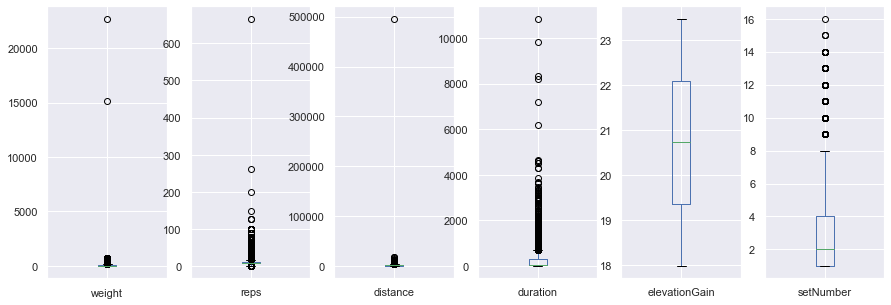

In [24]:
fig = plt.figure(figsize=(15,5))
for i, col in enumerate(numerical_val_col):
    ax0 = fig.add_subplot(161+i)
    df_clean[df_clean[col]>0].boxplot(column=[col], ax=ax0)

- max weight is 22692.799666 lbs
    - 2 very suspicious outliers: 
        - values: 22692.799666 lbs and 15119.612450 lbs
    - We could try to look for reasonable value from what is done in the same exercise and replace the outliers
    - But for now, let's just remove them.
- max rep is 666
    - I would not say this is impossible.
    - But is very unlikely so I will remove it.
- distance (m) max is 495677.952000 m
    - this is single time exercise (Cycling - Stationary)  with no rep
    - I think it is better to remove this data point
- duration (s) is fine
    - those outliers are running/hiking which expected to be long 

In [25]:
# weight: remove the entry
df_clean = df_clean.drop([33878], axis=0)
df_clean = df_clean.drop([41643], axis=0)

# reps : remove the entry
df_clean = df_clean.drop([55908], axis=0)

# distance: remove the entry
df_clean = df_clean.drop([23154], axis=0)

#### Descriptive statistics and Boxplots after removing suspicious points

In [26]:
df_stat = pd.DataFrame()
for i, col in enumerate(numerical_val_col):
    a_stat = pd.DataFrame(df_clean[df_clean[col]>0][col].describe())
    df_stat = pd.concat([df_stat,a_stat], axis=1)
df_stat

,weight,reps,distance,duration,elevationGain,setNumber
count,49079.000000,61474.000000,644.000000,1997.000000,2.000000,63518.000000
mean,58.107051,10.528012,1912.650067,341.753363,20.726500,2.672282
std,66.872494,6.022270,2416.971453,769.899441,3.879895,1.625328
min,0.045359,1.000000,2.438400,4.282849,17.983000,1.000000
25%,18.143716,8.000000,693.981120,25.000000,19.354750,1.000000
50%,36.287433,10.000000,1000.000000,60.000000,20.726500,2.000000
75%,73.000000,12.000000,2030.377979,294.000000,22.098250,4.000000
max,755.000000,263.000000,17992.465920,10839.280946,23.470000,16.000000


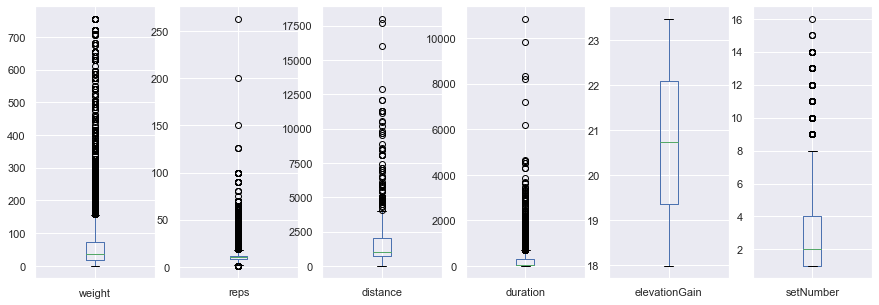

In [27]:
fig = plt.figure(figsize=(15,5))
for i, col in enumerate(numerical_val_col):
    ax0 = fig.add_subplot(161+i)
    df_clean[df_clean[col]>0].boxplot(column=[col], ax=ax0)

- Note: data is very skew in all cases, except the elevation gain.

In [28]:
print ('After cleaning the input table has {} rows and {} columns.'.format(df_clean.shape[0],df_clean.shape[1]))

After cleaning the input table has 63518 rows and 12 columns.


#### How many unique users and excercises are we looking at ?

In [29]:
df_clean.describe(include=['O'])

,singleSetId,exerciseSetParseId,exerciseName,workoutId,fake_user_id
count,63518,63518,63518,63518,63518
unique,63478,17609,536,2453,20
top,wV0y0Ep9l5,xkPP7FA1t0,Back Squat,ozPPEWbUHm,fake_id_394
freq,2,16,1247,99,24535


In [30]:
print ('There are in total {} unique users.'.format(len(df_clean['fake_user_id'].unique())) )

There are in total 20 unique users.


In [31]:
exer_name_list = list(df_clean['exerciseName'].unique())
print ('There are {} unique excercise names.'.format(len(exer_name_list)) )

There are 536 unique excercise names.


- There are  
    - 20 unique users
    - 536 unique excercises

#### What is the date range in our data?

In [32]:
daterange = df_clean['workoutDate'].describe()
print ('The data has the date ranging from {} to {}.'.format(daterange['first'].date(), daterange['last'].date()))

The data has the date ranging from 2016-02-02 to 2019-09-12.


- We have more than 3 years of data

### Comparing performance between users: The average load for an exercise.

In [33]:
## set up color scheme for each user
col_names = ['blue','black','brown','cyan','olive','green','lightgreen','red','yellow','violet',
            'pink','orange','yellowgreen','sienna','purple','orangered','navy','magenta','gray','lime']
colors_dict = {}
count = 0
for key, val in mcd.CSS4_COLORS.items():
    if key in col_names:
        colors_dict[df_clean['fake_user_id'].unique()[count]] = val
        count += 1
    if len(colors_dict) >= 20:
        break

In [34]:
def plot_avg_meas(df_clean, exer_Name, measure, colors_dict):
    ''' 
    plot average load (weight,distance,duration,elevationGain) 
    as a function of set number for all users 
    '''
    con1 = df_clean['exerciseName'] == exer_Name
    con2 = (df_clean[measure] != 0)
    df_exercise = df_clean[con1 & con2]
    
    df_exercise = df_exercise.pivot_table(index=['setNumber'], columns='fake_user_id', values=measure)
    
    fig = plt.figure(figsize=(8, 5))
    ax = plt.subplot(111)
    _ = plt.xlabel("set number")
    _ = plt.ylabel(measure)
    _ = plt.title('Average ' + measure + ' for ' + exer_Name)

    x_ticks = list(df_exercise.index)
    _ = plt.xticks(np.array(x_ticks))

    for i, iuser in enumerate(df_exercise.columns):
        _ = ax.plot(df_exercise.index, df_exercise.loc[:,iuser], label=iuser, 
                   marker='o', markersize=5, color=colors_dict[iuser])
        
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

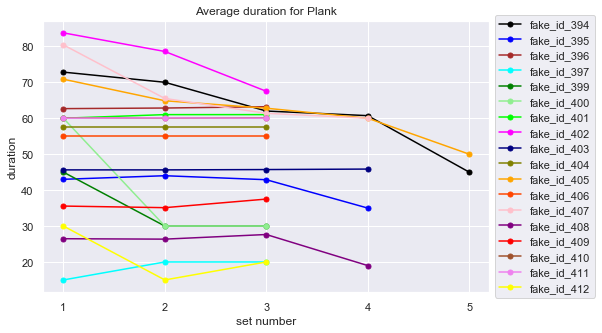

In [35]:
plot_avg_meas(df_clean = df_clean, exer_Name = 'Plank', measure = 'duration', colors_dict=colors_dict)

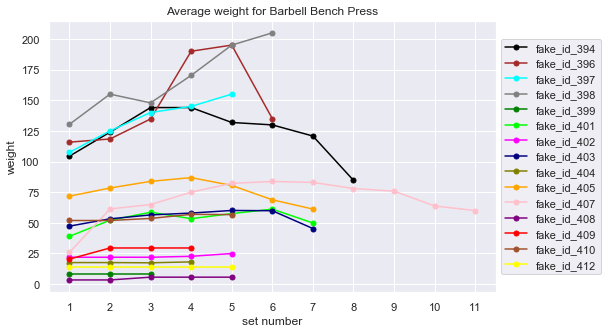

In [36]:
plot_avg_meas(df_clean = df_clean, exer_Name = 'Barbell Bench Press', measure = 'weight', colors_dict=colors_dict)

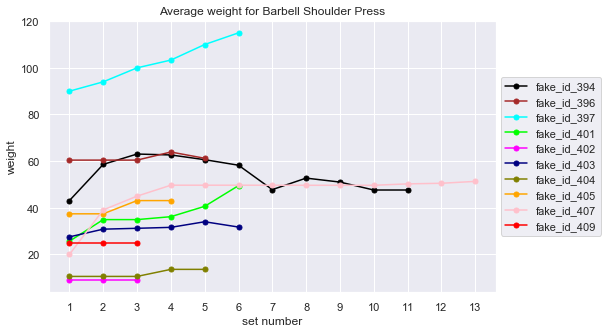

In [37]:
plot_avg_meas(df_clean = df_clean, exer_Name = 'Barbell Shoulder Press', measure = 'weight', colors_dict=colors_dict)

- We can see different behaviour among users, e.g.
    - user id_394 usually uses lower load at the end of an exercise
    - user id_397 tends to use highest load at the end of an exercise

### Which excercises are more popular? 
- We look at the number of total life-time sets for the 4 most frequently performed excercises for each user

In [38]:
list_user_id = list(df_clean['fake_user_id'].unique())

# getting the 4 most frequently done excercises (based on total number of set, i.e. counting the records)
num_type_exer = 4
df_temp = pd.DataFrame()
for id in list_user_id:
    df_this_temp = df_clean[df_clean['fake_user_id']==id].groupby(['fake_user_id','exerciseName']).count()\
                        .reset_index().sort_values(by=['singleSetId'], ascending=False)\
                        .iloc[:num_type_exer,:][['fake_user_id','exerciseName','singleSetId']]
    
    df_temp = pd.concat([df_temp, df_this_temp])

# pivot and fill nan with 0
df_temp = df_temp.pivot_table(
            index=['fake_user_id'], columns='exerciseName', values='singleSetId').fillna(0)
# revert the pivotting
df_temp = df_temp.stack().reset_index()
df_temp.rename(columns={0:'count'}, inplace=True)

[Text(1, 0, '0.0'), Text(1, 0, '361.5'), Text(1, 0, '723.0')]

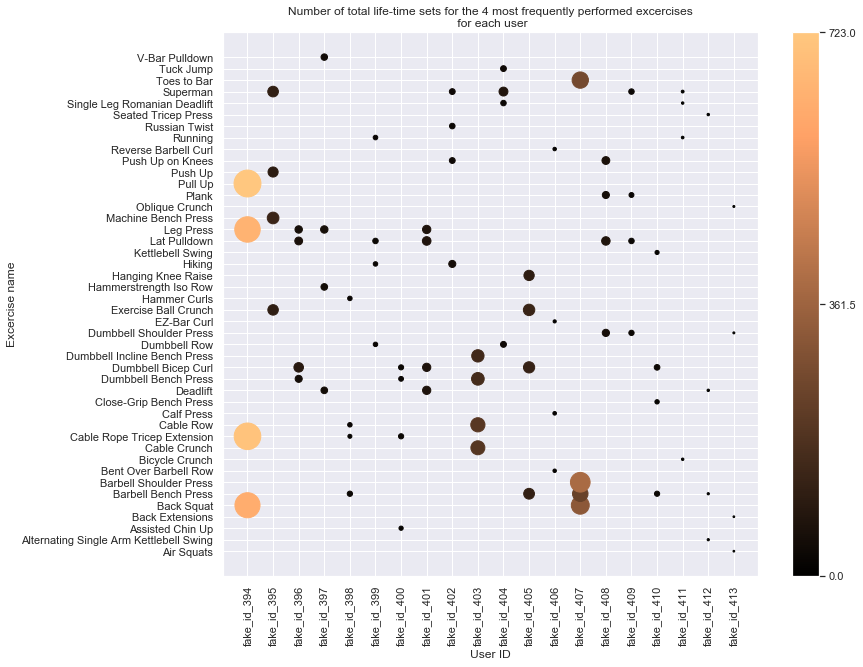

In [39]:
fig = plt.figure(figsize=(12, 10))
ax = plt.subplot(111)
_ = plt.xlabel("User ID")
_ = plt.ylabel('Excercise name')
_ = plt.title('Number of total life-time sets for the {} most frequently performed excercises\n for each user'\
              .format(num_type_exer))
_ = plt.xticks(rotation=90)

_ = ax.scatter(x="fake_user_id", y="exerciseName", s="count",c="count", data=df_temp, cmap=plt.cm.copper)

min_ = df_temp['count'].min()
mid_ = (df_temp['count'].max() - df_temp['count'].min())/2
max_ = df_temp['count'].max()

cbar = fig.colorbar(_,ticks=[min_,mid_,max_])
cbar.ax.set_yticklabels([min_,mid_,max_])

### How has a user been progressing over time?
- plotting the max weight (distance/duration) for an exercise as a function of date

In [40]:
def plot_max_meas(df_clean, exer_Name, measure, colors_dict):
    '''
    plot the max weight (reps/distance/duration) for an exercise
    '''
    con_bbbpress = df_clean['exerciseName'] == exer_Name

    df_exercise = df_clean[con_bbbpress][[measure,'workoutDate','fake_user_id']]\
                    .groupby(['fake_user_id','workoutDate']).max()
    
    df_exercise = df_exercise.pivot_table(index=['workoutDate'], columns='fake_user_id', values=measure)
    
    fig = plt.figure(figsize=(10, 4))
    ax = plt.subplot(111)
    _ = plt.xlabel("Workout Date")
    _ = plt.ylabel(measure)
    _ = plt.title('Max ' + measure + ' for ' + exer_Name)
    _ = plt.xticks(rotation=45)

    start_date = df_exercise.index[0]
    end_date   = df_exercise.index[-1] + datetime.timedelta(50)
    dates_reange = [ (start_date + datetime.timedelta(n)).strftime("%Y-%m-%d") for n in range(
                                                            0, int((end_date - start_date).days), 50
                                                            ) ]
    for i, iuser in enumerate(df_exercise.columns):
        #if i >2 : break
        _ = ax.plot(df_exercise[iuser].dropna(), label=iuser, 
                    marker='o', markersize=5, color=colors_dict[iuser], )
        
    _ = plt.xticks(dates_reange)
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

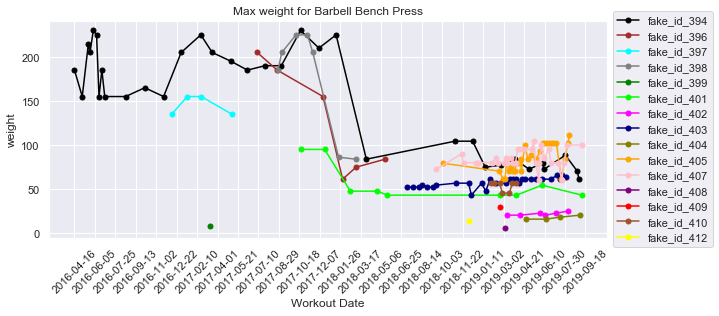

In [41]:
plot_max_meas(df_clean=df_clean, exer_Name='Barbell Bench Press', measure='weight', colors_dict=colors_dict)

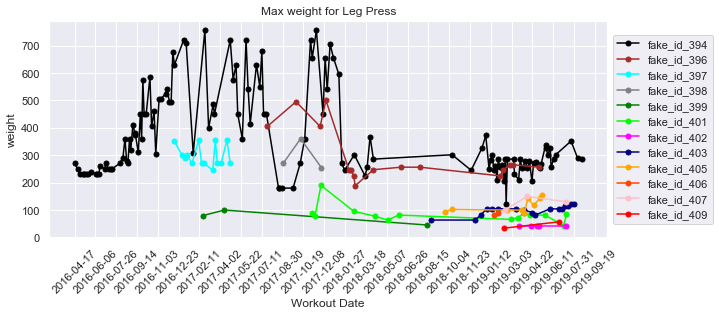

In [42]:
plot_max_meas(df_clean=df_clean, exer_Name='Leg Press', measure='weight', colors_dict=colors_dict)

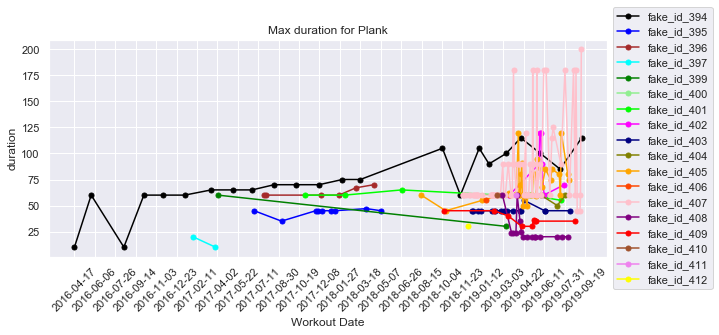

In [43]:
plot_max_meas(df_clean=df_clean, exer_Name='Plank', measure='duration', colors_dict=colors_dict)

- The user id 394 has a long history of workout starting since early 2016.
    - his strength drops sharply at the end of 2017.
- The user id 407 has been very active since Fall 2018

<a id='sec_eda_target'></a>
### (3.2) EDA: Focus on target variable
- I decide to build a model to predict the maximum weight for Barbell Bench Press based on the maximum load (weight/reps/duration/distance) of other exercises
    - target variable : maximum weight for Barbell Bench Press
    - features : maximum load (weight/reps/duration/distance) of other exercises done in the same month

### Build new data frame for modeling

In [44]:
# determine which load shuld be used as a measure for each exercise
# e.g. plank-duration, hike-distance, etc.
df_gby_exer  = df_clean.groupby('exerciseName').sum().reset_index()
wht_gr0 = df_gby_exer['weight'] >0
dis_gr0 = df_gby_exer['distance']>0
dur_gr0 = df_gby_exer['duration']>0
rep_gr0 = df_gby_exer['reps']>0

wht_0 = df_gby_exer['weight']==0
dis_0 = df_gby_exer['distance']==0
dur_0 = df_gby_exer['duration']==0
rep_0 = df_gby_exer['reps']==0

con_type_wht = wht_gr0
con_type_dis = wht_0 & dis_gr0 
con_type_dur = wht_0 & dis_0 & dur_gr0 
con_type_rep = wht_0 & dis_0 & dur_0 & rep_gr0

ex_type_wht = list(df_gby_exer[con_type_wht]['exerciseName']) # weight
ex_type_rep = list(df_gby_exer[con_type_rep]['exerciseName']) # reps
ex_type_dur = list(df_gby_exer[con_type_dur]['exerciseName']) # duration
ex_type_dis = list(df_gby_exer[con_type_dis]['exerciseName']) # distance

load_types = ['weight', 'reps', 'distance', 'duration']
load_abbrv = ['wht_','rep_','dis_','dur_']
lol_ex_type = [ex_type_wht, ex_type_rep, ex_type_dis, ex_type_dur]

In [45]:
# build a new data frame (target vs features)
con_bbbpress = df_clean['exerciseName'] == 'Barbell Bench Press'
df_max_wht_1 = df_clean[con_bbbpress][['weight','workoutDate','fake_user_id']].\
                groupby(['fake_user_id','workoutDate']).max()

df_max_wht_1 = df_max_wht_1.reset_index()
df_max_wht_1.rename(columns={'weight':'wht_BarbellBenchPress'}, inplace=True)

for it, ex_type in enumerate(lol_ex_type):
    print ('... doing ', load_types[it] )
    for i, exer_name in enumerate(ex_type):
        if exer_name == 'Barbell Bench Press': continue
        #print (i, exer_name)
        rename_exer = load_abbrv[it] + exer_name.replace(' ','')
        con_ex = df_clean['exerciseName'] == exer_name

        df_max_wht = df_clean[con_ex][[load_types[it],'workoutDate','fake_user_id']]\
            .groupby(['fake_user_id','workoutDate']).max()
        
        df_max_wht = df_max_wht.reset_index()
        df_max_wht.rename(columns={load_types[it]:rename_exer}, inplace=True)
        df_max_wht_1 = pd.merge(df_max_wht_1, df_max_wht, on=['fake_user_id','workoutDate'], how='outer')

... doing  weight
... doing  reps
... doing  distance
... doing  duration


In [46]:
df_max_wht_1.head()

,fake_user_id,workoutDate,wht_BarbellBenchPress,wht_AbCrunchMachine,wht_AbRollout,wht_AbsComplex,wht_AirSquats,wht_AlternatingSingleArmKettlebellSwing,wht_ArnoldDumbbellPress,wht_AroundtheWorlds,...,dur_StabilityBallPlank,dur_StairStepper,dur_StandingForwardBend,dur_StaticLunge,dur_StomachVacuum,dur_SupineBackStretch,dur_TricepStretch,dur_UpDog,dur_WallPectoralStretch,dur_WallSit
0,fake_id_394,2016-04-16,185.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fake_id_394,2016-05-05,155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fake_id_394,2016-05-20,215.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,fake_id_394,2016-05-24,205.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,fake_id_394,2016-06-01,230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# it is not often (as expected) that many execises are done on the same day that the Barbell Bench Press was done
# my idea is to group data by week >> too scarce
# so, I grup data by month
df_max_wht_1['year'] = df_max_wht_1['workoutDate'].apply(lambda x : x.year)
df_max_wht_1['week'] = df_max_wht_1['workoutDate'].apply(lambda x : x.week)
df_max_wht_1['month'] = df_max_wht_1['workoutDate'].apply(lambda x : x.month)

df_max_wht_2 = df_max_wht_1.groupby(['fake_user_id','year','month']).max()

- if grouping by week we will have 154 data points
    - the execercise that most often go with Barbell Bench Press is wht_HammerCurls
        - there are only 77 data points with wht_HammerCurls being done
- if grouping by month we will have 101 data points
    - this time we have 83 data points with wht_HammerCurls being done

In [48]:
# From 536 ecercises 
# pick the fisrt 20 ecercises that most frequently preformed together
x = df_max_wht_2[df_max_wht_2['wht_BarbellBenchPress'].notnull()].isnull().sum().sort_values().drop(
                                                                            index=['workoutDate','week'])
target_features = list(x[:21].index)
target = target_features[0]
features = target_features[1:]

In [49]:
print (' Target variable: ', target)
print (' Preselected features: ', len(features), '\n', features)

 Target variable:  wht_BarbellBenchPress
 Preselected features:  20 
 ['wht_HammerCurls', 'wht_DumbbellBicepCurl', 'wht_DumbbellInclineBenchPress', 'wht_CableRopeTricepExtension', 'wht_LatPulldown', 'wht_DumbbellRow', 'wht_DumbbellBenchPress', 'wht_DumbbellShoulderPress', 'wht_BackSquat', 'wht_EZ-BarCurl', 'wht_CableRow', 'wht_Deadlift', 'wht_CableCrossoverFly', 'wht_DumbbellFly', 'wht_BarbellInclineBenchPress', 'wht_BarbellCurl', 'dur_Plank', 'wht_DumbbellShrug', 'wht_LegPress', 'wht_DumbbellSkullcrusher']


In [50]:
# select entries where wht_BarbellBenchPress is available 
df_model_full = df_max_wht_2[df_max_wht_2['wht_BarbellBenchPress'].notnull()][target_features].reset_index()

# for other columns, if data is not available, set to 0
df_model_full = df_model_full.fillna(0)

In [51]:
df_model_full.shape

(101, 24)

### EDA for the target variables: max weight for Barbell Bench Press

In [52]:
df_model_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 24 columns):
fake_user_id                     101 non-null object
year                             101 non-null int64
month                            101 non-null int64
wht_BarbellBenchPress            101 non-null float64
wht_HammerCurls                  101 non-null float64
wht_DumbbellBicepCurl            101 non-null float64
wht_DumbbellInclineBenchPress    101 non-null float64
wht_CableRopeTricepExtension     101 non-null float64
wht_LatPulldown                  101 non-null float64
wht_DumbbellRow                  101 non-null float64
wht_DumbbellBenchPress           101 non-null float64
wht_DumbbellShoulderPress        101 non-null float64
wht_BackSquat                    101 non-null float64
wht_EZ-BarCurl                   101 non-null float64
wht_CableRow                     101 non-null float64
wht_Deadlift                     101 non-null float64
wht_CableCrossoverFly            101

#### Visualize target variable (Barbell Bench Press)

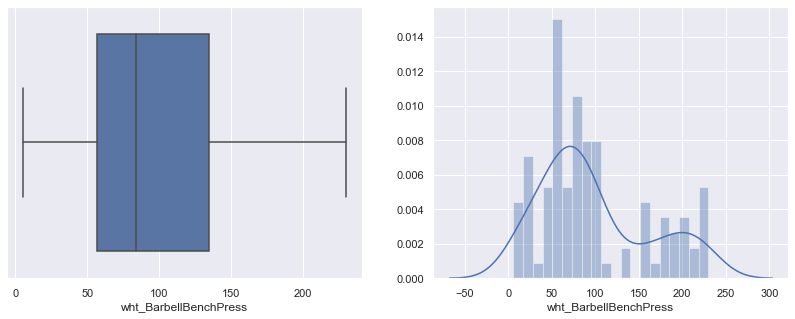

In [53]:
_ = plt.figure(figsize = (14, 5))
_ = plt.subplot(1,2,1)
_ = sns.boxplot(df_model_full.wht_BarbellBenchPress)
_ = plt.subplot(1,2,2)
_ = sns.distplot(df_model_full.wht_BarbellBenchPress, bins=20)
#_ = plt.show()

In [54]:
def plot_feature(df, col):
    '''
    Make plot for each features
    left, the distribution of samples on the feature
    right, the dependance of target variable on the feature
    '''
    cond = df[col]>0
    
    x_lab = 'load'
    if col.find('wht') >= 0:
        x_lab = col.replace('wht_', '') + ' max weight'
    if col.find('rep') >= 0:
        x_lab = col.replace('rep_', '') + ' max reps'
    if col.find('dis') >= 0:
        x_lab = col.replace('dis_', '') + ' max distance'
    if col.find('dur') >= 0:
        x_lab = col.replace('dur_', '') + ' max duration'
    
    plt.figure(figsize = (14, 5))
    plt.subplot(1, 2, 1)
    sns.distplot(df[cond][col], bins=20)
    plt.xticks(rotation=45)
    plt.xlabel(x_lab)
    plt.ylabel('Counts')
    
    plt.subplot(1, 2, 2)
    plt.scatter(df[cond]['wht_BarbellBenchPress'],df[cond][col])
    plt.xticks(rotation=45)
    plt.ylabel('BarbellBenchPress max weight')
    plt.xlabel(x_lab)
    plt.show()

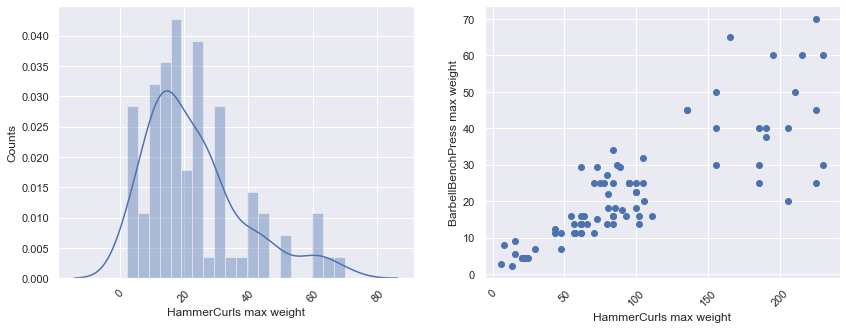

In [55]:
plot_feature(df_model_full,'wht_HammerCurls')

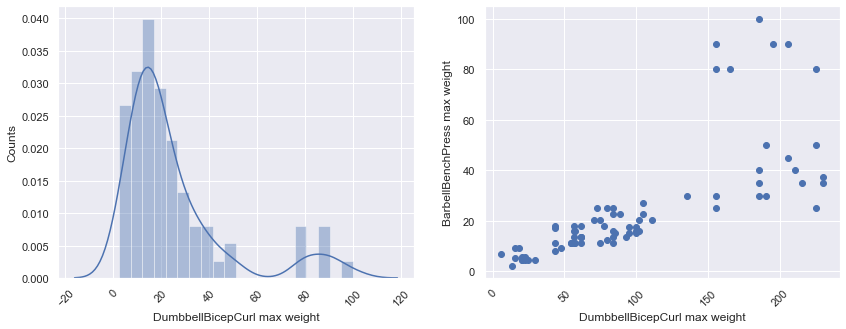

In [56]:
plot_feature(df_model_full,'wht_DumbbellBicepCurl')

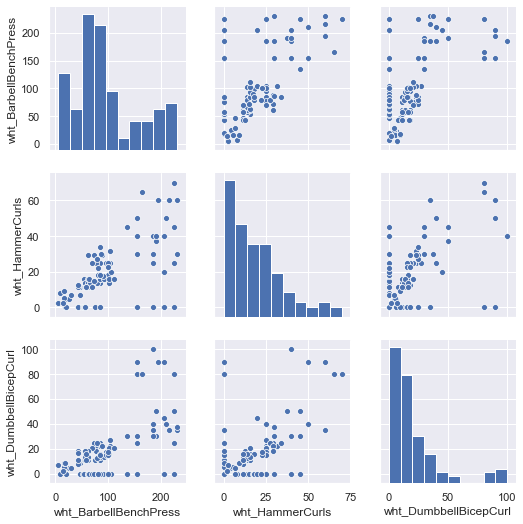

In [57]:
# this line take long to run
sns.pairplot(df_model_full[target_features[:3]])

- if ignoring 0 values, genally we can see linear relationship between features and the BarbellBechPress

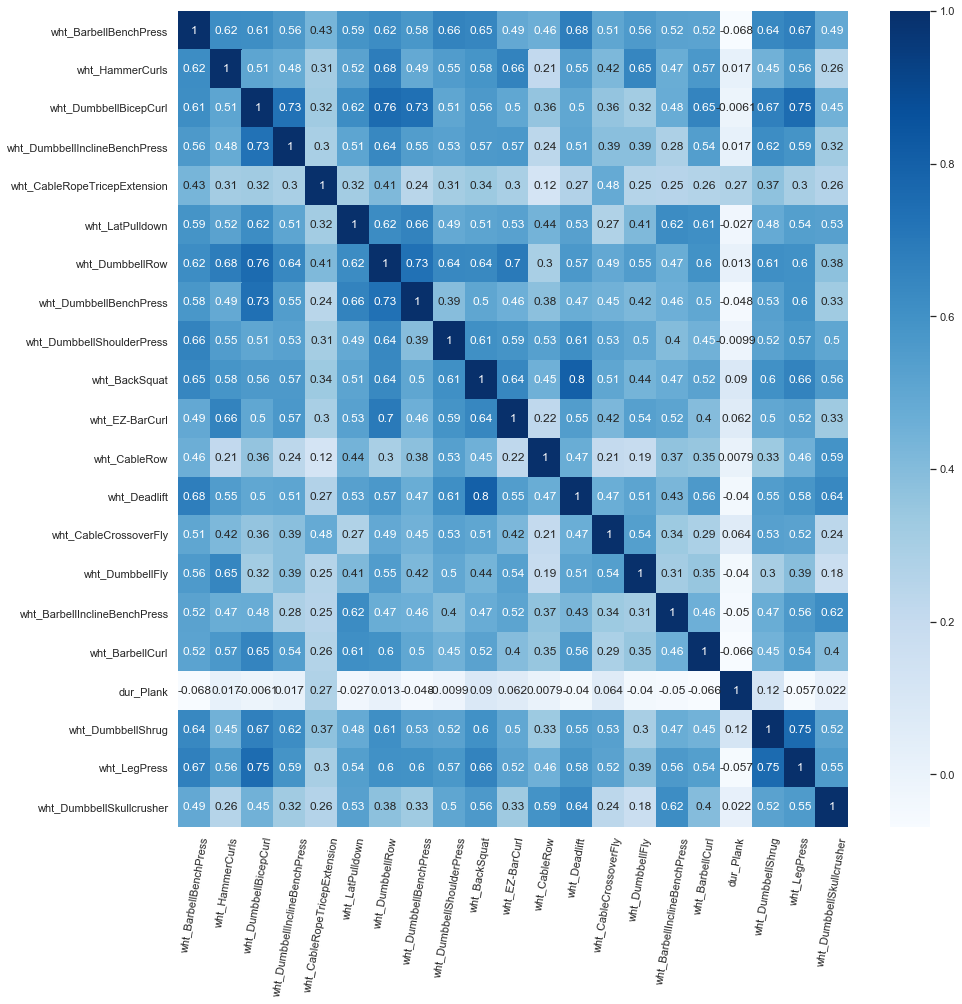

In [58]:
# Correlations between selected features and response
fig = plt.figure(figsize=(15, 15))
sns.heatmap(df_model_full[[target] + features].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=80)
plt.show()

- We see that Deadlift is most strongly correlated with BarbellBechPress, followed by LegPress and DumbellShoulderPress.
- Plank is not correlated with BarbellBechPress.
- Among the features, we see that most features have a fair degree of correlation to each other (mostly < 0.75).

#### Save DataFrame for model building

In [59]:
df_model_full.to_csv('max_load_excercise.csv', index=False)

<a id='sec_model'></a>
## (4) Model Building
- **I will consider linear regression and random forest models**

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [61]:
df_model_full = pd.read_csv('max_load_excercise.csv') 

In [62]:
#get target and feature df
feature_df = df_model_full.drop(['fake_user_id','year','month','wht_BarbellBenchPress'], axis=1)
target_df = df_model_full[['wht_BarbellBenchPress']]
train_feature_df, test_feature_df, train_target_df, test_target_df = train_test_split(
                                                            feature_df,target_df,test_size=0.3,random_state=2)

#### Random Forest Parameter tuning

In [63]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=2)
param = {'n_estimators': [10, 50, 150, 300],
        'max_depth': [30, 60, 90, None],
        'min_samples_split': [3, 5, 10, 20],
        'max_features': [5, 10, 15, 20]}

gs = GridSearchCV(rf, param, cv=2, n_jobs=-1)
gs_fit = gs.fit(train_feature_df, train_target_df)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
129,0.047217,0.001693,0.006945,0.000648,90,5,3,50,"{'max_depth': 90, 'max_features': 5, 'min_samp...",0.875361,0.601632,0.738497,0.136864,1
1,0.043361,0.001175,0.008839,0.002909,30,5,3,50,"{'max_depth': 30, 'max_features': 5, 'min_samp...",0.875361,0.601632,0.738497,0.136864,1
65,0.059682,0.017878,0.006382,0.000185,60,5,3,50,"{'max_depth': 60, 'max_features': 5, 'min_samp...",0.875361,0.601632,0.738497,0.136864,1
193,0.045792,0.001238,0.006265,0.000012,None,5,3,50,"{'max_depth': None, 'max_features': 5, 'min_sa...",0.875361,0.601632,0.738497,0.136864,1
133,0.050884,0.009177,0.011407,0.005286,90,5,5,50,"{'max_depth': 90, 'max_features': 5, 'min_samp...",0.869823,0.600642,0.735233,0.134591,5


- The data is so scarce that the parameter tuning result is not stable.
    - So, I just pick some values, knowing that a random forest usually performs well with relatively few fully grown decision trees. 

### Model Selections
- using cross validation score

In [64]:
#initialize model list and dicts
models = []
mean_mse = {}
cv_std = {}
res = {}

#define number of processes to run in parallel
num_procs = 2

#shared model paramaters
verbose_lvl = 5

#create models -- hyperparameter tuning should be already done by hand for each model
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=10, n_jobs=num_procs, max_depth=None, min_samples_split=5, \
                                max_features=5, verbose=verbose_lvl)

models.extend([lr,rf])

In [65]:
def train_model(model, feature_df, target_df, num_procs, mean_mse, cv_std):
    neg_mse = cross_val_score(model, feature_df, target_df, cv=2, n_jobs=num_procs, scoring='neg_mean_squared_error')
    mean_mse[model] = -1.0*np.mean(neg_mse)
    cv_std[model] = np.std(neg_mse)
    
def print_summary(model, mean_mse, cv_std):
    print('\nModel:\n', model)
    print('\tAverage MSE:\n \t', mean_mse[model])
    print('\tStandard deviation during CV:\n \t', cv_std[model])

In [66]:
#parallel cross-validate models, using MSE as evaluation metric, and print summaries
print("Beginning cross validation")
for model in models:
    train_model(model, train_feature_df, train_target_df, num_procs, mean_mse, cv_std)
    print_summary(model, mean_mse, cv_std)

Beginning cross validation

Model:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
	Average MSE:
 	 5038.54736989333
	Standard deviation during CV:
 	 1455.5307778760941

Model:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                      oob_score=False, random_state=None, verbose=5,
                      warm_start=False)
	Average MSE:
 	 1212.1377980477293
	Standard deviation during CV:
 	 816.2975155795397


- Random Forest has a better performance in terms of Mean Squre Error

### Linear regression Result

In [67]:
def plot_resut_scatter(train_target_pred, train_target_true):
    _ = plt.figure(figsize=(5, 5))
    _ = plt.scatter(train_target_pred, train_target_true)
    _ = plt.xlabel("train_target_pred")
    _ = plt.ylabel("train_target_true")
    
def plot_residual(train_target_pred, train_target_true):
    # calculate residual and percentage residual
    np_pred = np.array(train_target_pred)
    np_true = np.array(train_target_true)
    res_w = (np_pred-np_true)
    pct_res_w = res_w*100/np_true

    rmse = np.std(res_w)
    stdized_res = res_w/rmse

    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(311)
    _ = plt.scatter(np_pred, res_w)
    _ = plt.ylabel("Residual")

    ax2 = fig.add_subplot(312)
    _ = plt.scatter(np_pred, pct_res_w)
    _ = plt.ylabel("Percentage Residual")

    ax3 = fig.add_subplot(313)
    _ = plt.scatter(np_pred, stdized_res)
    _ = plt.xlabel("Predicted")
    _ = plt.ylabel("Standardized Residual")

In [68]:
models[0].fit(train_feature_df,train_target_df)
train_target_pred = models[0].predict(train_feature_df)
train_target_true = train_target_df['wht_BarbellBenchPress']
if type(train_target_pred[0]) == type(train_target_pred):
    train_target_pred = train_target_pred[:,0]

In [69]:
r_sq = models[0].score(train_feature_df, train_target_df)
print ('R^2 score is', r_sq)

R^2 score is 0.8161736958787307


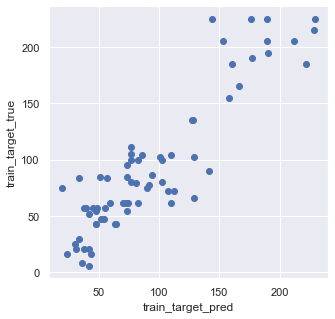

In [70]:
plot_resut_scatter(train_target_pred, train_target_true)

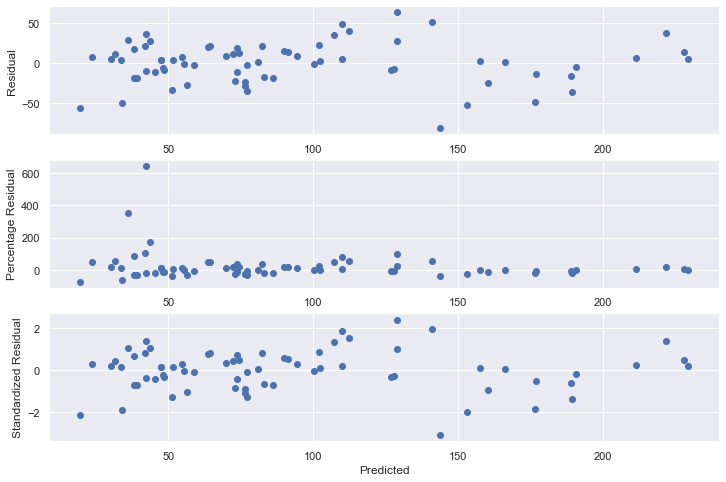

In [71]:
plot_residual(train_target_pred, train_target_true)

#### investigate linear regression using statsmodels

In [72]:
import statsmodels.api as sm
est = sm.OLS(train_target_df, sm.add_constant(train_feature_df))
linear_reg = est.fit()
print(linear_reg.summary())

                              OLS Regression Results                             
Dep. Variable:     wht_BarbellBenchPress   R-squared:                       0.816
Model:                               OLS   Adj. R-squared:                  0.741
Method:                    Least Squares   F-statistic:                     10.88
Date:                   Fri, 08 Nov 2019   Prob (F-statistic):           7.47e-12
Time:                           22:12:39   Log-Likelihood:                -327.53
No. Observations:                     70   AIC:                             697.1
Df Residuals:                         49   BIC:                             744.3
Df Model:                             20                                         
Covariance Type:               nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

- Look at the p-value of the coeeficient of each variable :
    - we should select only the one with p-value < 0.05 and then re-train the model

### Random Forest Result

In [73]:
models[1].fit(train_feature_df,train_target_df)
train_target_pred = models[1].predict(train_feature_df)
train_target_true = train_target_df['wht_BarbellBenchPress']
if type(train_target_pred[1]) == type(train_target_pred):
    train_target_pred = train_target_pred[:,0]

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10building tree 10 of 10



In [74]:
r_sq = models[1].score(train_feature_df, train_target_df)
print ('R^2 score is', r_sq)

R^2 score is 0.9587981351605723


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


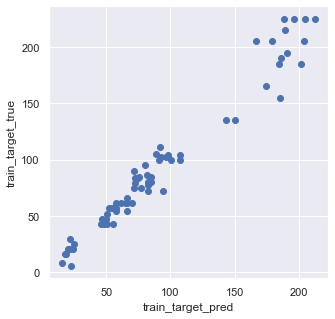

In [75]:
plot_resut_scatter(train_target_pred, train_target_true)

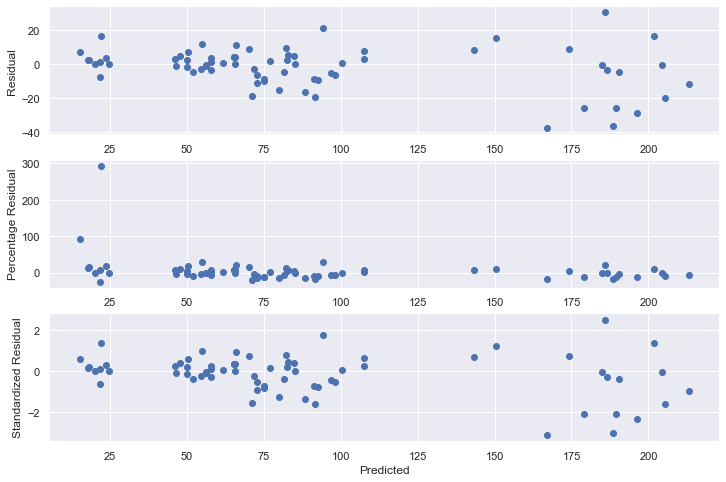

In [76]:
plot_residual(train_target_pred, train_target_true)

- looking at R^2 score and residual plots also confirms that Random Forest has better performance

### Feature importance

RangeIndex(start=0, stop=1, step=1)


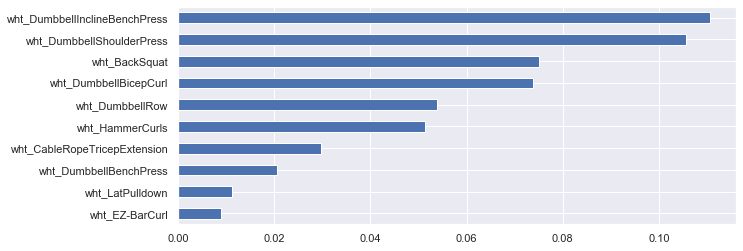

In [82]:
## create df of feature importance for plotting
data= []
dat ={}
objects = list(train_feature_df.columns)[:10]
f_important = models[1].feature_importances_[:10]
for i in range(len(objects)):
    dat[objects[i]] =  f_important[i]
data +=[dat]

df_imp = pd.DataFrame(data)
df_imp = df_imp.transpose()
print (df_imp.columns)
df_imp = df_imp.sort_values(by=0, axis=0, ascending=True)

# make plot
df_imp.plot(kind='barh',legend=False, figsize=(10,4))

- The most important feature is **Dumbbell Incline BenchPress** following by **Dumbbell Shoulder Press**.

In [80]:
list(train_feature_df.columns)[:10]

['wht_HammerCurls',
 'wht_DumbbellBicepCurl',
 'wht_DumbbellInclineBenchPress',
 'wht_CableRopeTricepExtension',
 'wht_LatPulldown',
 'wht_DumbbellRow',
 'wht_DumbbellBenchPress',
 'wht_DumbbellShoulderPress',
 'wht_BackSquat',
 'wht_EZ-BarCurl']

#### Calculate R^2 score on test sample

In [77]:
r_sq_test = models[1].score(test_feature_df, test_target_df)
print ('R^2 score on test sample is', round(r_sq_test,3))

R^2 score on test sample is 0.841


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


In [78]:
# save model
from joblib import load
from joblib import dump
toBePersisted = dict({
    'model': models[1],
    'metadata': {
        'name': 'randomForest_max_wht_BarbellBenchPress',
        'author': 'Apichart H',
        
    }
})

dump(toBePersisted, 'randomForest_max_wht_BarbellBenchPress.joblib')

['randomForest_max_wht_BarbellBenchPress.joblib']

<a id='sec_conc'></a> 
## (5) Conclusion

- The data set has been explored and cleaned.
    - There are data points where the load is unrealistically high.
    - There is some inconsistency in data recording.
        - The duration of planking sometimes was recorded in the reps columns
    - The non-uniqueness issue of singleSetId.
        - If, in the same day, a user decides to do a second workoout with an execise that was done in the first workout, the singleSetId will be the same as recorded for the first workout.
- EDA has been performed and a number of plots revealing some insights have been shown.
    - The user id 394 has a long history of workout starting since early 2016. However, for unknown reason his strength drops sharply at the end of 2017.
- A randon forest model has been built to predict the maximum weight used in the Barbell Bench Press exercise.
    - The resulting R^2 on test sample is  0.84.
    - The most important feature is Dumbbell Incline BenchPress.

### How would you go about building this model if you received a larger dataset?

- Using the current data set, we have the caseses where my target variable has high value while one or more of the dependent variables are zero. Having a lot of these data points can confuse our model and resulting in low performance. 
- If there is more data, the relative amount of these type of data points will be reduced. We can also increase the number of features used in the model.
